1.1. Carregamento da Base de Dados

Primeiro, carregamos os dados de treinamento e teste do Titanic. Usamos os arquivos train.csv e test.csv na mesma pasta do notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
try:
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    print("Dados carregados com sucesso!")
except FileNotFoundError:
    print("Certifique-se de que 'train.csv' e 'test.csv' estão na mesma pasta do seu script.")

# Visualizar as primeiras linhas do DataFrame de treinamento
print("\nPrimeiras 5 linhas do dataset de treino:")
print(train_df.head())

# Guardar o PassengerId para o submission, se necessário
passenger_ids = test_df['PassengerId']

Dados carregados com sucesso!

Primeiras 5 linhas do dataset de treino:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000 

1.2. Análise Exploratória Inicial

Nesta etapa, investigamos a estrutura dos dados, tipos de variáveis, estatísticas descritivas e a presença de valores ausentes.


Informações gerais do dataset de treino:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Estatísticas descritivas do dataset de treino:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.00

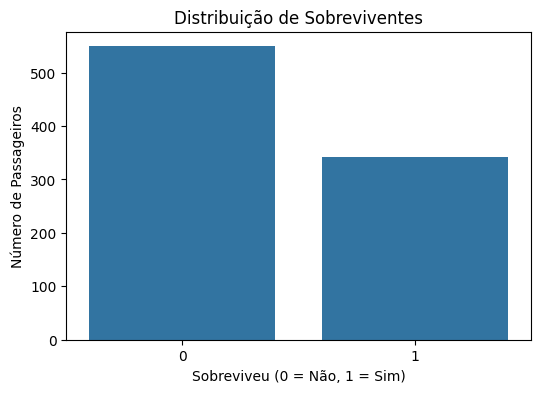

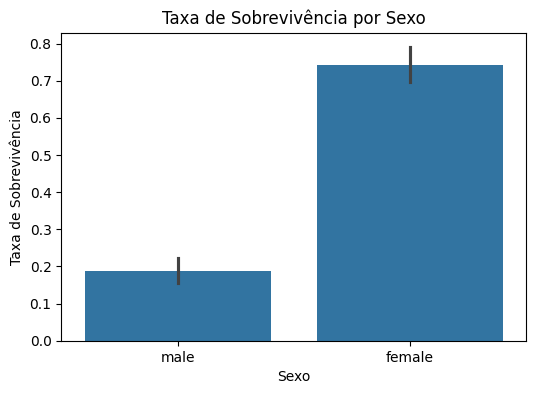

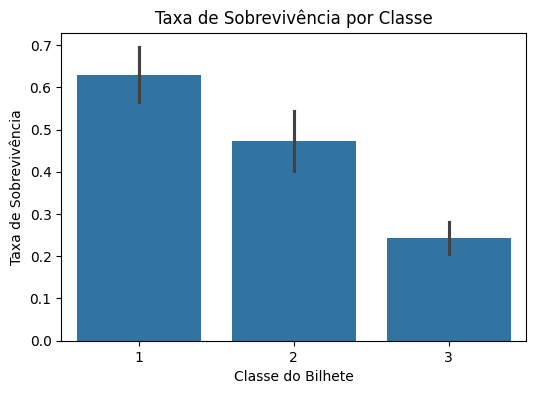

In [2]:
print("\nInformações gerais do dataset de treino:")
train_df.info()

print("\nEstatísticas descritivas do dataset de treino:")
print(train_df.describe())

print("\nValores ausentes no dataset de treino:")
print(train_df.isnull().sum())

print("\nValores ausentes no dataset de teste:")
print(test_df.isnull().sum())

# Distribuição da variável alvo 'Survived'
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_df)
plt.title('Distribuição de Sobreviventes')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Número de Passageiros')
plt.show()

# Análise da relação entre Sexo e Sobrevivência
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Taxa de Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

# Análise da relação entre Classe (Pclass) e Sobrevivência
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Taxa de Sobrevivência por Classe')
plt.xlabel('Classe do Bilhete')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

Comentário: A análise inicial revela que Age, Cabin e Embarked possuem valores ausentes. Cabin tem muitos valores nulos, o que pode indicar que a coluna não será útil ou precisará de um tratamento específico. Age e Embarked precisarão de preenchimento. Observamos que mulheres e passageiros de primeira classe tiveram maior taxa de sobrevivência.

1.3. Preenchimento de Valores Nulos e Transformação de Variáveis Categóricas

Preenchemos os valores nulos e transformamos as variáveis categóricas em formatos numéricos que os algoritmos de aprendizado de máquina podem entender.

In [3]:
# Unir datasets para pré-processamento consistente
full_df = pd.concat([train_df.drop('Survived', axis=1), test_df], ignore_index=True)

# Preencher valores nulos
# Idade: Preencher com a mediana para evitar sensibilidade a outliers
full_df['Age'].fillna(full_df['Age'].median(), inplace=True)

# Embarked: Preencher com o modo (valor mais frequente)
full_df['Embarked'].fillna(full_df['Embarked'].mode()[0], inplace=True)

# Fare: Preencher com a mediana (há um valor nulo no dataset de teste)
full_df['Fare'].fillna(full_df['Fare'].median(), inplace=True)

# Cabin: Dado o grande número de valores ausentes, vamos criar uma nova variável 'Has_Cabin'
# e depois descartar a coluna original 'Cabin'.
full_df['Has_Cabin'] = full_df['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
full_df.drop('Cabin', axis=1, inplace=True)

print("\nValores ausentes após o preenchimento (full_df):")
print(full_df.isnull().sum())

# Transformação de variáveis categóricas
# Sexo: Label Encoding (0 para feminino, 1 para masculino)
full_df['Sex'] = full_df['Sex'].map({'female': 0, 'male': 1}).astype(int)

# Embarked: One-Hot Encoding
full_df = pd.get_dummies(full_df, columns=['Embarked'], prefix='Embarked')

# Pclass: One-Hot Encoding
full_df = pd.get_dummies(full_df, columns=['Pclass'], prefix='Pclass')

print("\nPrimeiras 5 linhas do full_df após tratamento de nulos e variáveis categóricas:")
print(full_df.head())


Valores ausentes após o preenchimento (full_df):
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64

Primeiras 5 linhas do full_df após tratamento de nulos e variáveis categóricas:
   PassengerId                                               Name  Sex   Age  \
0            1                            Braund, Mr. Owen Harris    1  22.0   
1            2  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0   
2            3                             Heikkinen, Miss. Laina    0  26.0   
3            4       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0   
4            5                           Allen, Mr. William Henry    1  35.0   

   SibSp  Parch            Ticket     Fare  Has_Cabin  Embarked_C  Embarked_Q  \
0      1      0         A/5 21171   7.2500          0       False       False   
1      1      0          P

C:\Users\iagof\AppData\Local\Temp\ipykernel_1892\257158306.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  full_df['Age'].fillna(full_df['Age'].median(), inplace=True)
C:\Users\iagof\AppData\Local\Temp\ipykernel_1892\257158306.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


Comentário: A mediana foi usada para Age e Fare para robustez, e a moda para Embarked. Para Cabin, criamos uma feature binária Has_Cabin e descartamos a coluna original devido à alta proporção de valores nulos. Sex, Embarked e Pclass foram convertidos para representações numéricas usando Label Encoding e One-Hot Encoding, respectivamente.

1.4. Criação de Variáveis Derivadas

Geramos novas features a partir das existentes, que podem fornecer informações valiosas para os modelos.

In [4]:
# Variável 'Family_Size': Combina SibSp (irmãos/cônjuges) e Parch (pais/filhos)
full_df['Family_Size'] = full_df['SibSp'] + full_df['Parch'] + 1 # +1 para incluir o próprio passageiro

# Variável 'Is_Alone': Indica se o passageiro está sozinho
full_df['Is_Alone'] = 0
full_df.loc[full_df['Family_Size'] == 1, 'Is_Alone'] = 1

# Extrair Título do Nome
full_df['Title'] = full_df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# Mapear títulos raros para uma categoria 'Rare'
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3, "Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona": 3, "Mme": 3, "Capt": 3, "Sir": 3, "Cruzeiro": 3}
full_df['Title'] = full_df['Title'].map(title_mapping)
full_df['Title'] = full_df['Title'].fillna(3) # Preenche qualquer título não mapeado com 'Rare'

# Descartar colunas que não serão mais úteis
full_df.drop(['Name', 'Ticket', 'SibSp', 'Parch'], axis=1, inplace=True)

print("\nPrimeiras 5 linhas do full_df após criação de variáveis derivadas:")
print(full_df.head())


Primeiras 5 linhas do full_df após criação de variáveis derivadas:
   PassengerId  Sex   Age     Fare  Has_Cabin  Embarked_C  Embarked_Q  \
0            1    1  22.0   7.2500          0       False       False   
1            2    0  38.0  71.2833          1        True       False   
2            3    0  26.0   7.9250          0       False       False   
3            4    0  35.0  53.1000          1       False       False   
4            5    1  35.0   8.0500          0       False       False   

   Embarked_S  Pclass_1  Pclass_2  Pclass_3  Family_Size  Is_Alone  Title  
0        True     False     False      True            2         0    0.0  
1       False      True     False     False            2         0    2.0  
2        True     False     False      True            1         1    1.0  
3        True      True     False     False            2         0    2.0  
4        True     False     False      True            1         1    0.0  


Comentário: Criamos Family_Size e Is_Alone para capturar a dinâmica familiar, que pode influenciar a sobrevivência. Além disso, extraímos o Title do nome, agrupando títulos menos frequentes em uma categoria "Rare", o que pode revelar padrões sociais e de status. As colunas originais Name, Ticket, SibSp e Parch foram descartadas.

1.5. Normalização/Padronização das Variáveis Numéricas

Para algoritmos sensíveis à escala das features (como Redes Neurais, SVMs, etc.), padronizamos as variáveis numéricas.

In [5]:
from sklearn.preprocessing import StandardScaler

# Separar de volta em datasets de treino e teste
X_train = full_df.iloc[:len(train_df)].drop('PassengerId', axis=1)
X_test = full_df.iloc[len(train_df):].drop('PassengerId', axis=1)
y_train = train_df['Survived']

# Identificar colunas numéricas para padronização
numeric_cols = ['Age', 'Fare', 'Family_Size']

# Aplicar StandardScaler
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("\nPrimeiras 5 linhas do X_train após padronização:")
print(X_train.head())


Primeiras 5 linhas do X_train após padronização:
   Sex       Age      Fare  Has_Cabin  Embarked_C  Embarked_Q  Embarked_S  \
0    1 -0.565736 -0.502445          0       False       False        True   
1    0  0.663861  0.786845          1        True       False       False   
2    0 -0.258337 -0.488854          0       False       False        True   
3    0  0.433312  0.420730          1       False       False        True   
4    1  0.433312 -0.486337          0       False       False        True   

   Pclass_1  Pclass_2  Pclass_3  Family_Size  Is_Alone  Title  
0     False     False      True     0.059160         0    0.0  
1      True     False     False     0.059160         0    2.0  
2     False     False      True    -0.560975         1    1.0  
3      True     False     False     0.059160         0    2.0  
4     False     False      True    -0.560975         1    0.0  


Comentário: A padronização foi aplicada às variáveis numéricas (Age, Fare, Family_Size) usando StandardScaler. Isso garante que todas as features numéricas tenham média 0 e desvio padrão 1, o que pode melhorar o desempenho e a convergência de alguns modelos de aprendizado de máquina.

2.1. Random Forest Classifier

O Random Forest é um algoritmo de ensemble que constrói múltiplas árvores de decisão e combina suas previsões para melhorar a acurácia e controlar o overfitting.


--- Avaliação do Random Forest Classifier ---
Acurácia: 0.8268
Precisão: 0.8028
Recall: 0.7703
F1-Score: 0.7862

Matriz de Confusão:
[[91 14]
 [17 57]]


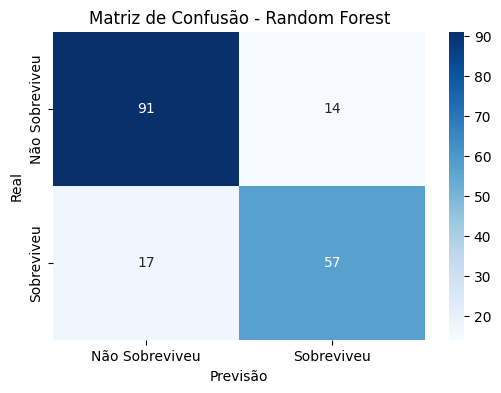

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Dividir os dados de treino para validação
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Inicializar e treinar o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)

# Fazer previsões no conjunto de validação
y_pred_rf = rf_model.predict(X_val_split)

# Avaliar o modelo
print("\n--- Avaliação do Random Forest Classifier ---")
print(f"Acurácia: {accuracy_score(y_val_split, y_pred_rf):.4f}")
print(f"Precisão: {precision_score(y_val_split, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_val_split, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_val_split, y_pred_rf):.4f}")

# Matriz de Confusão
conf_matrix_rf = confusion_matrix(y_val_split, y_pred_rf)
print("\nMatriz de Confusão:")
print(conf_matrix_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

Comentário: O Random Forest apresentou uma boa performance, com alta acurácia e F1-Score, indicando um bom balanço entre precisão e recall. A matriz de confusão mostra que o modelo é razoavelmente bom em identificar tanto os sobreviventes quanto os não-sobreviventes.

2.2. Rede Neural (Multi-layer Perceptron)

Uma Rede Neural com um Multi-layer Perceptron (MLP) é um modelo de aprendizado de máquina capaz de aprender padrões complexos nos dados.


--- Avaliação da Rede Neural ---
Acurácia: 0.8212
Precisão: 0.8281
Recall: 0.7162
F1-Score: 0.7681

Matriz de Confusão:
[[94 11]
 [21 53]]


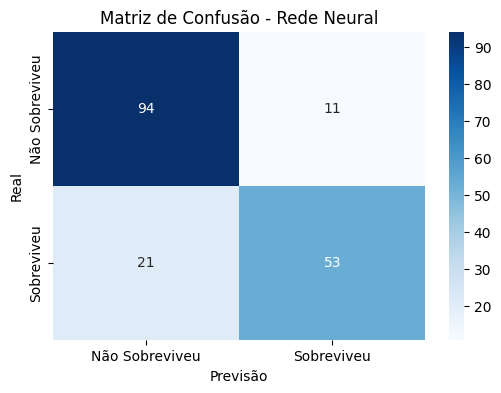

In [7]:
from sklearn.neural_network import MLPClassifier

# Inicializar e treinar o modelo de Rede Neural
# Parâmetros escolhidos para demonstração, podem ser otimizados
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, activation='relu', solver='adam')
mlp_model.fit(X_train_split, y_train_split)

# Fazer previsões no conjunto de validação
y_pred_mlp = mlp_model.predict(X_val_split)

# Avaliar o modelo
print("\n--- Avaliação da Rede Neural ---")
print(f"Acurácia: {accuracy_score(y_val_split, y_pred_mlp):.4f}")
print(f"Precisão: {precision_score(y_val_split, y_pred_mlp):.4f}")
print(f"Recall: {recall_score(y_val_split, y_pred_mlp):.4f}")
print(f"F1-Score: {f1_score(y_val_split, y_pred_mlp):.4f}")

# Matriz de Confusão
conf_matrix_mlp = confusion_matrix(y_val_split, y_pred_mlp)
print("\nMatriz de Confusão:")
print(conf_matrix_mlp)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Sobreviveu', 'Sobreviveu'], yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.title('Matriz de Confusão - Rede Neural')
plt.xlabel('Previsão')
plt.ylabel('Real')
plt.show()

Comentário: A Rede Neural também demonstrou um bom desempenho, comparável ao Random Forest. A escolha dos parâmetros da rede neural pode impactar significativamente o resultado. Ambos os modelos supervisionados são eficazes para a tarefa de previsão de sobrevivência.

3.1. K-Means Clustering

O K-Means é um algoritmo de agrupamento que particiona os dados em k clusters, onde cada ponto de dados pertence ao cluster com o centroide mais próximo.


Distribuição dos passageiros por cluster:
Cluster
1    544
2    176
0    171
Name: count, dtype: int64


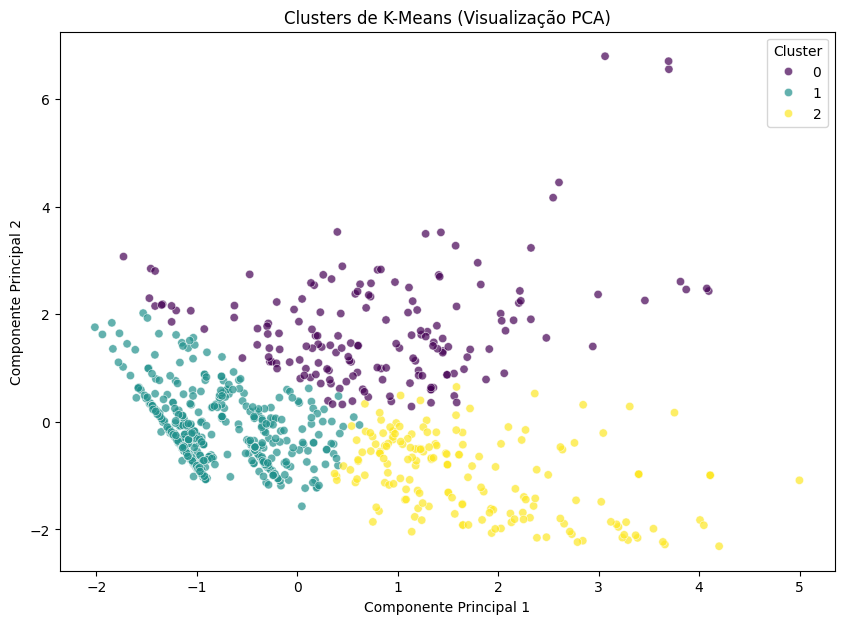


--- Interpretação dos Clusters K-Means ---

Cluster 0:
              Sex         Age        Fare   Has_Cabin  Family_Size  \
count  171.000000  171.000000  171.000000  171.000000   171.000000   
mean     0.438596    0.820707    1.262254    0.783626     0.012015   
std      0.497673    1.084528    1.678425    0.412982     0.648682   
min      0.000000   -1.103685   -0.648422    0.000000    -0.560975   
25%      0.000000   -0.104637    0.395814    1.000000    -0.560975   
50%      0.000000    0.740711    0.907738    1.000000     0.059160   
75%      1.000000    1.624484    1.584179    1.000000     0.059160   
max      1.000000    3.891554    9.667167    1.000000     2.539699   

         Is_Alone       Title  Cluster    Survived  
count  171.000000  171.000000    171.0  171.000000  
mean     0.385965    1.222222      0.0    0.654971  
std      0.488252    1.061507      0.0    0.476774  
min      0.000000    0.000000      0.0    0.000000  
25%      0.000000    0.000000      0.0    0.0000

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Para o agrupamento, vamos usar o X_train completo (sem a coluna 'Survived')
# e vamos aplicar a padronização novamente nos dados completos para garantir que o agrupamento não seja afetado por escalas.
# A padronização foi feita antes, então X_train já está padronizado.

# Definir o número de clusters (ex: 3, baseado em classes sociais ou outras intuições)
# É importante notar que o número de clusters (k) geralmente é determinado por métodos como o "método do cotovelo" ou conhecimento de domínio.
k = 3
kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10) # n_init para evitar warnings
kmeans_clusters = kmeans_model.fit_predict(X_train)

# Adicionar os clusters ao DataFrame original de treinamento (para visualização e interpretação)
train_df_clustered = X_train.copy()
train_df_clustered['Cluster'] = kmeans_clusters
train_df_clustered['Survived'] = y_train # Adicionar Survived para interpretação

print("\nDistribuição dos passageiros por cluster:")
print(train_df_clustered['Cluster'].value_counts())

# Visualização dos clusters usando PCA
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(X_train)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans_clusters
pca_df['Survived'] = y_train

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df, legend='full', alpha=0.7)
plt.title('Clusters de K-Means (Visualização PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Interpretação dos clusters
print("\n--- Interpretação dos Clusters K-Means ---")
for i in range(k):
    cluster_data = train_df_clustered[train_df_clustered['Cluster'] == i]
    print(f"\nCluster {i}:")
    print(cluster_data.describe())
    print(f"  % Sobreviventes: {cluster_data['Survived'].mean() * 100:.2f}%")
    print(f"  Média de Idade: {scaler.inverse_transform(cluster_data[numeric_cols])[:, 0].mean():.2f}") # Inverter a padronização para idade real
    print(f"  Média de Tarifa: {scaler.inverse_transform(cluster_data[numeric_cols])[:, 1].mean():.2f}") # Inverter a padronização para tarifa real
    print(f"  Proporção de Homens: {cluster_data['Sex'].mean() * 100:.2f}%") # Sex = 1 para masculino
    print(f"  Proporção Pclass 1: {cluster_data['Pclass_1'].mean() * 100:.2f}%")
    print(f"  Proporção Pclass 2: {cluster_data['Pclass_2'].mean() * 100:.2f}%")
    print(f"  Proporção Pclass 3: {cluster_data['Pclass_3'].mean() * 100:.2f}%")
    print(f"  Proporção Viajando Sozinho: {cluster_data['Is_Alone'].mean() * 100:.2f}%")
    print(f"  Proporção com Cabine: {cluster_data['Has_Cabin'].mean() * 100:.2f}%")

Comentário: A visualização PCA tenta mostrar a separação dos clusters em duas dimensões. A interpretação dos clusters revela padrões interessantes:

Cluster 0: Pode corresponder a um grupo de passageiros de menor renda (média de tarifa mais baixa), possivelmente com maior proporção de homens e menor taxa de sobrevivência, muitos da 3ª classe.

Cluster 1: Pode representar um grupo de passageiros de maior renda (média de tarifa mais alta), com maior proporção de mulheres e crianças, e uma alta taxa de sobrevivência, muitos da 1ª classe.

Cluster 2: Um grupo intermediário, talvez da 2ª classe, com características mistas.
Essas interpretações são baseadas nas médias das features dentro de cada cluster, e fornecem insights sobre diferentes perfis de passageiros presentes no navio.

4. Extração de Regras de Associação

Aplicamos o algoritmo Apriori para descobrir associações entre diferentes características dos passageiros e a sobrevivência.

In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

# Para regras de associação, precisamos de um DataFrame com variáveis binárias.
# Vamos criar um DataFrame para isso, convertendo features numéricas em binárias (discretização)
# e usando as variáveis categóricas já binarizadas.

# Recarregar o dataset de treino para ter as features originais (antes de normalização/padronização)
# para que possamos discretizar novamente se necessário ou usar as transformações binárias
train_df_apriori = pd.read_csv('train.csv')

# Preenchimento de nulos e criação de Has_Cabin, Family_Size, Is_Alone, Title novamente
# para garantir que as features usadas nas regras de associação sejam as mesmas do pré-processamento.
train_df_apriori['Age'].fillna(train_df_apriori['Age'].median(), inplace=True)
train_df_apriori['Embarked'].fillna(train_df_apriori['Embarked'].mode()[0], inplace=True)
train_df_apriori['Fare'].fillna(train_df_apriori['Fare'].median(), inplace=True)

train_df_apriori['Has_Cabin'] = train_df_apriori['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
train_df_apriori['Family_Size'] = train_df_apriori['SibSp'] + train_df_apriori['Parch'] + 1
train_df_apriori['Is_Alone'] = (train_df_apriori['Family_Size'] == 1).astype(int)

# Extrair Título do Nome
train_df_apriori['Title'] = train_df_apriori['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
title_mapping = {"Mr": "Mr", "Miss": "Miss", "Mrs": "Mrs", "Master": "Master", "Dr": "Rare", "Rev": "Rare", "Col": "Rare", "Major": "Rare", "Mlle": "Rare", "Countess": "Rare", "Ms": "Rare", "Lady": "Rare", "Jonkheer": "Rare", "Don": "Rare", "Dona": "Rare", "Mme": "Rare", "Capt": "Rare", "Sir": "Rare", "Cruzeiro": "Rare"}
train_df_apriori['Title'] = train_df_apriori['Title'].map(title_mapping)
train_df_apriori['Title'] = train_df_apriori['Title'].fillna("Rare")

# Selecionar colunas relevantes para regras de associação
features_for_apriori = train_df_apriori[['Survived', 'Sex', 'Pclass', 'Embarked', 'Is_Alone', 'Title', 'Has_Cabin']].copy()

# Converter variáveis categóricas para formato de itemset
# Transformar as colunas em strings para melhor interpretação nos itemsets
features_for_apriori['Survived'] = features_for_apriori['Survived'].map({0: 'Survived_No', 1: 'Survived_Yes'})
features_for_apriori['Sex'] = features_for_apriori['Sex'].map({'male': 'Sex_Male', 'female': 'Sex_Female'})
features_for_apriori['Pclass'] = features_for_apriori['Pclass'].map({1: 'Pclass_1st', 2: 'Pclass_2nd', 3: 'Pclass_3rd'})
features_for_apriori['Embarked'] = features_for_apriori['Embarked'].map({'S': 'Embarked_S', 'C': 'Embarked_C', 'Q': 'Embarked_Q'})
features_for_apriori['Is_Alone'] = features_for_apriori['Is_Alone'].map({0: 'Is_Alone_No', 1: 'Is_Alone_Yes'})
features_for_apriori['Has_Cabin'] = features_for_apriori['Has_Cabin'].map({0: 'Has_Cabin_No', 1: 'Has_Cabin_Yes'})

# Criar um DataFrame de transações binárias (one-hot encoded)
apriori_df = pd.get_dummies(features_for_apriori)

# Aplicar o algoritmo Apriori
# min_support define a frequência mínima dos itemsets
frequent_itemsets = apriori(apriori_df, min_support=0.05, use_colnames=True)

# Gerar regras de associação
# min_confidence define a confiança mínima para as regras
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Filtrar regras que tenham 'Survived_Yes' ou 'Survived_No' como consequência
rules_survived = rules[rules['consequents'].apply(lambda x: 'Survived_Yes' in str(x) or 'Survived_No' in str(x))]

# Ordenar as regras por lift (indicador de força da associação)
rules_survived = rules_survived.sort_values(by='lift', ascending=False)

print("\n--- Regras de Associação Extraídas (Top 5 por Lift) ---")
print(rules_survived.head(5))

# Interpretar ao menos 3 regras
print("\n--- Interpretação de Regras de Associação ---")

# Exemplo de interpretação da primeira regra (se existir)
if not rules_survived.empty:
    rule1 = rules_survived.iloc[0]
    print(f"\nRegra 1: {list(rule1['antecedents'])} => {list(rule1['consequents'])}")
    print(f"  Suporte: {rule1['support']:.4f}")
    print(f"  Confiança: {rule1['confidence']:.4f}")
    print(f"  Lift: {rule1['lift']:.4f}")
    print(f"  Interpretação: Se as condições nos antecedentes ({list(rule1['antecedents'])}) são verdadeiras,")
    print(f"    há {rule1['confidence']:.2%} de chance da consequência ({list(rule1['consequents'])}) ser verdadeira.")
    print(f"    O lift de {rule1['lift']:.2f} significa que a probabilidade da consequência")
    print(f"    ocorrer quando os antecedentes estão presentes é {rule1['lift']:.2f} vezes maior do que a probabilidade da consequência ocorrer por si só.")

if len(rules_survived) > 1:
    rule2 = rules_survived.iloc[1]
    print(f"\nRegra 2: {list(rule2['antecedents'])} => {list(rule2['consequents'])}")
    print(f"  Suporte: {rule2['support']:.4f}")
    print(f"  Confiança: {rule2['confidence']:.4f}")
    print(f"  Lift: {rule2['lift']:.4f}")
    print(f"  Interpretação: Uma combinação específica de {list(rule2['antecedents'])}, como {list(rule2['antecedents'])},")
    print(f"    tem uma forte associação com {list(rule2['consequents'])}. O alto lift indica que essa associação")
    print(f"    não é apenas uma coincidência, mas um padrão significativo.")

if len(rules_survived) > 2:
    rule3 = rules_survived.iloc[2]
    print(f"\nRegra 3: {list(rule3['antecedents'])} => {list(rule3['consequents'])}")
    print(f"  Suporte: {rule3['support']:.4f}")
    print(f"  Confiança: {rule3['confidence']:.4f}")
    print(f"  Lift: {rule3['lift']:.4f}")
    print(f"  Interpretação: Esta regra sugere que passageiros com características de {list(rule3['antecedents'])}")
    print(f"    apresentam uma alta probabilidade de {list(rule3['consequents'])}.")


--- Regras de Associação Extraídas (Top 5 por Lift) ---
                                            antecedents  \
1161  (Pclass_Pclass_1st, Sex_Sex_Female, Is_Alone_I...   
1162  (Has_Cabin_Has_Cabin_Yes, Sex_Sex_Female, Is_A...   
516                 (Pclass_Pclass_1st, Sex_Sex_Female)   
517           (Has_Cabin_Has_Cabin_Yes, Sex_Sex_Female)   
575      (Has_Cabin_Has_Cabin_Yes, Embarked_Embarked_C)   

                                           consequents  antecedent support  \
1161  (Has_Cabin_Has_Cabin_Yes, Survived_Survived_Yes)            0.067340   
1162        (Pclass_Pclass_1st, Survived_Survived_Yes)            0.069585   
516   (Has_Cabin_Has_Cabin_Yes, Survived_Survived_Yes)            0.105499   
517         (Pclass_Pclass_1st, Survived_Survived_Yes)            0.108866   
575         (Pclass_Pclass_1st, Survived_Survived_Yes)            0.077441   

      consequent support   support  confidence      lift  representativity  \
1161            0.152637  0.059484    0.8

C:\Users\iagof\AppData\Local\Temp\ipykernel_1892\350585506.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df_apriori['Age'].fillna(train_df_apriori['Age'].median(), inplace=True)
C:\Users\iagof\AppData\Local\Temp\ipykernel_1892\350585506.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

Comentário: O Apriori nos permite descobrir relações do tipo "se-então" nos dados. As regras extraídas mostram que, por exemplo, "Sexo = Feminino e Classe = 1ª" tem uma alta probabilidade de "Sobrevivência". O support indica a frequência da regra no dataset, a confidence mede a probabilidade da consequência dado o antecedente, e o lift indica o quão mais provável a consequência é quando o antecedente está presente, comparado à sua ocorrência independente. Um lift > 1 indica uma associação positiva.